# house price prediction

importing the dependencies

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



importing house price dataset

In [2]:
house_price_dataset= df = pd.read_csv("/content/california.csv")

In [3]:
print(house_price_dataset)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [4]:
house_price_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
#number of rows and columns in dataframe
house_price_dataset.shape

(20640, 10)

In [6]:
#check for missing values
house_price_dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [7]:
#droping missing values
house_price_dataset.dropna(inplace=True)

In [8]:
house_price_dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [9]:
#statistical measures of the datset
house_price_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


understanding the corealtion between various features in the dataset
1. positive corelation
2. second corelation

In [10]:
correlation=house_price_dataset.select_dtypes(include=['number']).corr()

<Axes: >

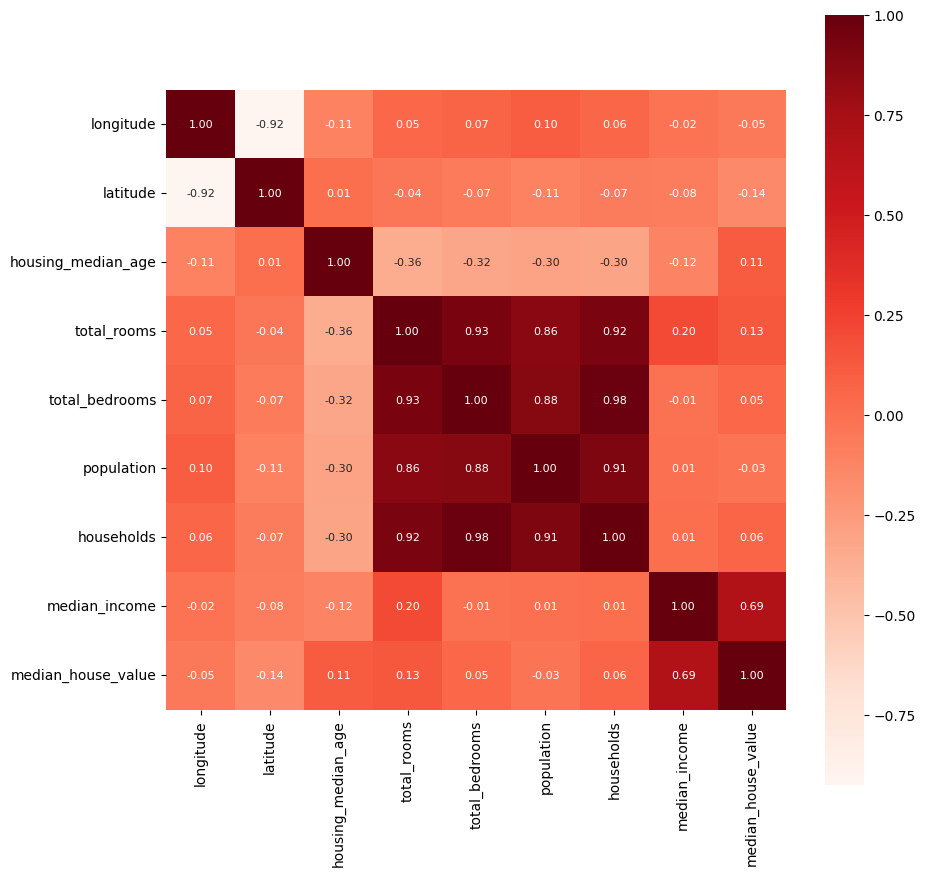

In [11]:
#constructing a heatmap to underdstand the corelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Reds')

splitting the data and target

In [12]:
X=house_price_dataset.drop(['median_house_value'],axis=1)
Y= house_price_dataset['median_house_value']

In [13]:
print(X)
print(Y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

Splitting the data into training and test data..


In [14]:
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(X.shape,X_train.shape)
print(X_test.shape)

(20433, 12) (16346, 12)
(4087, 12)


Model training

Xgboost Regressor

In [17]:
#loading the model

model=XGBRegressor()

In [18]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

prediction on training data

In [19]:
#accuracy for prediction on training data

In [20]:
training_data_prediction= model.predict(X_train)

In [21]:
print(training_data_prediction)

[ 82107.63 417878.4  364232.72 ... 126508.87 176195.6  126294.14]


In [24]:
# R SQUARED ERROR
score_1= metrics.r2_score(Y_train,training_data_prediction)

#mean absolute error
score_2= metrics.mean_absolute_error(Y_train,training_data_prediction)


print("R squred error:", score_1)
print("mean absolute error: ", score_2)

R squred error: 0.9408262372016907
mean absolute error:  19987.720703125


Visulising the actual price and predicted price

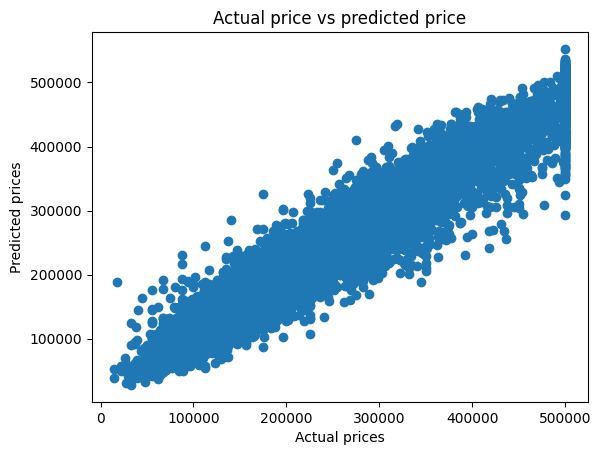

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual price vs predicted price")
plt.show()

Prediciton on test data


In [26]:
test_data_prediction= model.predict(X_test)

In [27]:
# R SQUARED ERROR
score_1= metrics.r2_score(Y_test,test_data_prediction)

#mean absolute error
score_2= metrics.mean_absolute_error(Y_test,test_data_prediction)


print("R squred error:", score_1)
print("mean absolute error: ", score_2)

R squred error: 0.8232760429382324
mean absolute error:  31750.064453125


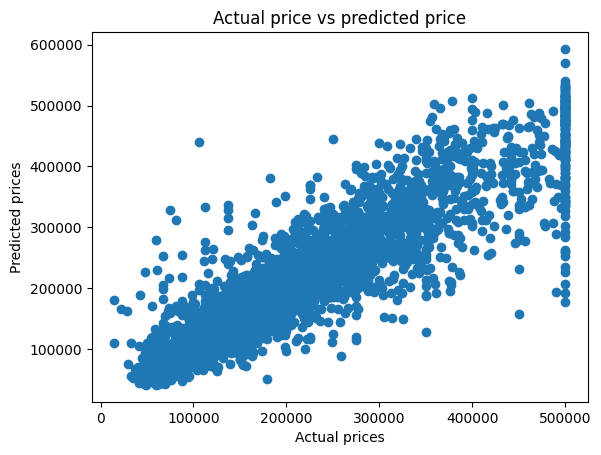

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual price vs predicted price")
plt.show()